In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

**1.  Data acquisition of the movielens dataset**

In [3]:
df_movie=pd.read_csv('Movie_Id_Titles.csv')
df_movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
df_movie.shape

(1682, 2)

In [5]:
df_rating=pd.read_csv('Dataset.csv')
df_rating.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
df_rating.shape

(100003, 4)

In [7]:
movie_rating_df = pd.merge(df_movie,df_rating,on = 'item_id')
movie_rating_df.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [8]:
movie_rating_df.shape

(100003, 5)

In [9]:
#Data acquisition of the users dataset
df_user = pd.read_csv("users.dat",sep='::')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [10]:
df = pd.concat([movie_rating_df,df_user], axis=1)
df.head()

,item_id,title,user_id,rating,timestamp,UserID,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),308,4,887736532,2.0,M,56.0,16.0,70072
1,1,Toy Story (1995),287,5,875334088,3.0,M,25.0,15.0,55117
2,1,Toy Story (1995),148,4,877019411,4.0,M,45.0,7.0,02460
3,1,Toy Story (1995),280,4,891700426,5.0,M,25.0,20.0,55455
4,1,Toy Story (1995),66,3,883601324,6.0,F,50.0,9.0,55117


In [11]:
df_user.shape

(6039, 5)

In [12]:
df.shape

(100003, 10)

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0])

0         M
1         M
2         M
3         M
4         F
         ..
99998     M
99999     M
100000    M
100001    M
100002    M
Name: Gender, Length: 100003, dtype: object

**2.  Perform the Exploratory Data Analysis (EDA) for the users dataset**

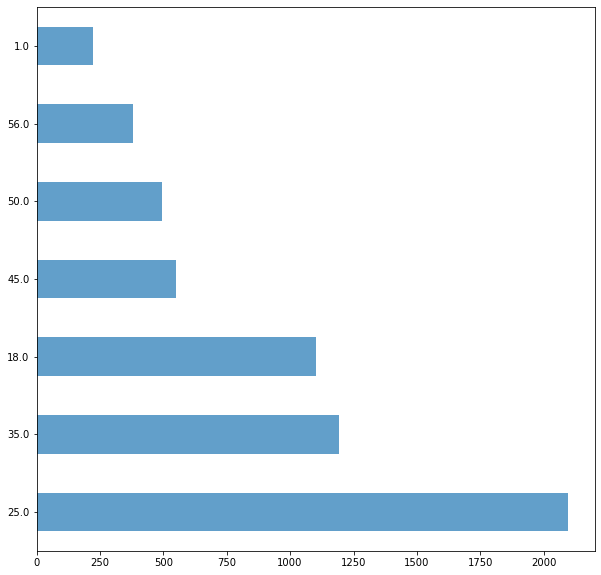

In [14]:
#Visualize user age distribution
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

In [15]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


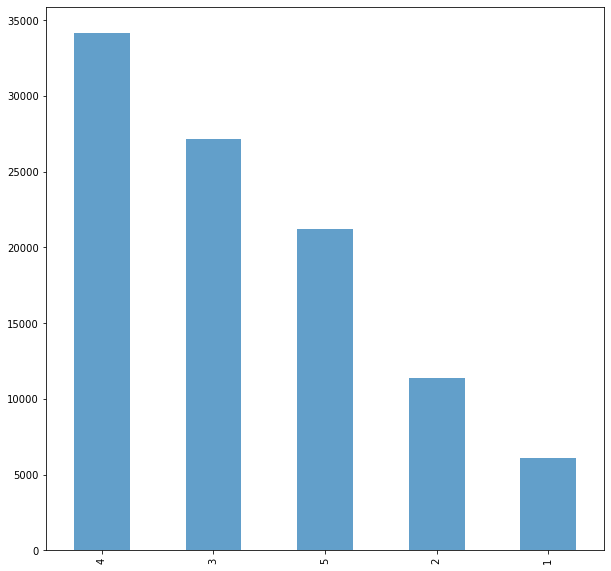

In [16]:
#Visualize overall rating by users
df['rating'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

In [17]:

groupedby_movieName = df.groupby('title')
groupedby_rating = df.groupby('rating')
groupedby_uid = df.groupby('user_id')

In [18]:
movies = df.groupby('title').size().sort_values(ascending=True)[:1000]
print(movies)

title
Á köldum klaka (Cold Fever) (1994)             1
Mille bolle blu (1993)                         1
Mat' i syn (1997)                              1
Marlene Dietrich: Shadow and Light (1996)      1
Man from Down Under, The (1943)                1
                                              ..
Rising Sun (1993)                             43
Pete's Dragon (1977)                          43
Renaissance Man (1994)                        43
Chamber, The (1996)                           43
Mouse Hunt (1997)                             44
Length: 1000, dtype: int64


In [19]:
ToyStory_data = groupedby_movieName.get_group('Toy Story (1995)')
ToyStory_data.shape

(452, 11)

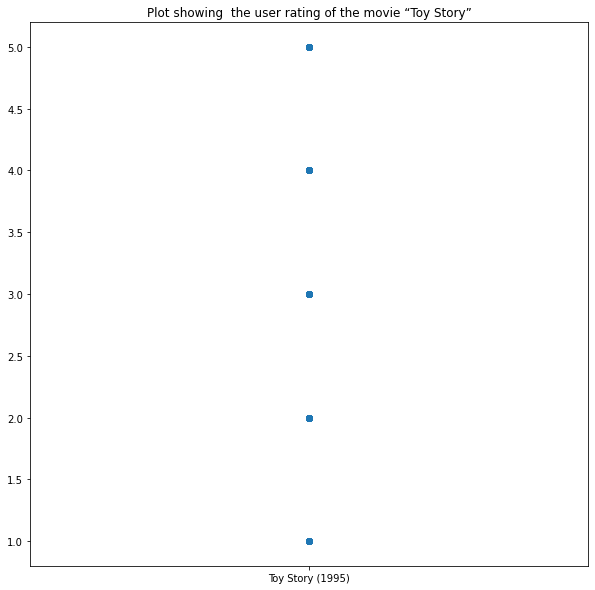

In [20]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(10,10))
plt.scatter(ToyStory_data['title'],ToyStory_data['rating'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()

In [21]:
ToyStory_data[['title','Age','rating']].head()

,title,Age,rating
0,Toy Story (1995),56.0,4
1,Toy Story (1995),25.0,5
2,Toy Story (1995),45.0,4
3,Toy Story (1995),25.0,4
4,Toy Story (1995),50.0,3


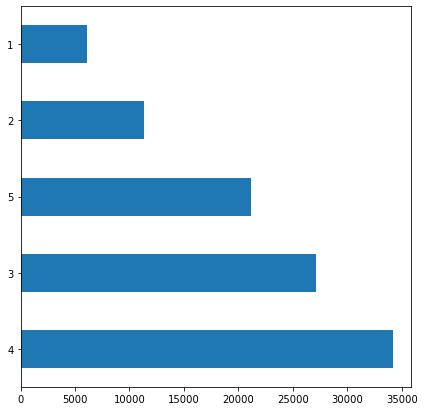

In [22]:
#Find and visualize the top 25 movies by viewership rating
top_25 = df[25:]
top_25['rating'].value_counts().plot(kind='barh',figsize=(7,7))
plt.show()

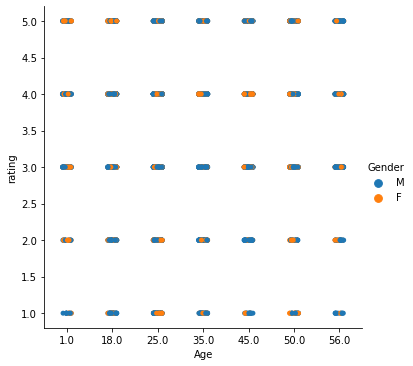

In [23]:
sns.catplot(x='Age',y='rating',hue='Gender',data=df)

In [24]:
#Visualize the rating data by user of user id =200
userid_200 = groupedby_uid.get_group(200)
userid_200[['user_id','rating']]

,user_id,rating
76,200,5
468,200,4
1017,200,4
1424,200,4
1774,200,4
...,...,...
97470,200,4
97514,200,3
97699,200,4
99083,200,3


**Perform machine learning on first 500 extracted records**

In [25]:
# We need to categorize the imdb values in the range of 1,2,3,4 and 5 to mark them as the bad,average,good and excellent movies respectively
df["ratings"]=pd.cut(df['rating'], bins=[1,2,3,4,5], right=True, labels=False)+1

In [26]:
#First 500 extracted records
df.dropna(inplace=True)

In [27]:
df['Gender']=df['Gender'].replace('M',1)
df['Gender']=df['Gender'].replace('F',0)

In [28]:
#Use the following features:movie id,age,occupation
x = df.drop('rating',axis=1)
x.drop(['title','UserID','Occupation','Zip-code','age_group'],axis=1,inplace=True)

In [29]:
#Use rating as label
y =df['rating'].values

In [30]:
#Create train and test data set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

**Perform the following: **

In [31]:
x_train

,item_id,user_id,timestamp,Gender,Age,ratings
3662,22,710,882063852,0,35.0,2.0
5223,32,13,882140286,1,18.0,3.0
3216,17,21,874951695,1,56.0,3.0
1903,9,723,880498912,0,35.0,2.0
4216,25,196,881251955,1,50.0,3.0
...,...,...,...,...,...,...
3911,23,312,891698613,1,18.0,3.0
5393,37,773,888540352,1,50.0,2.0
5433,38,435,884133509,1,45.0,1.0
5605,40,276,874791871,1,18.0,2.0


In [32]:
# K Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_predic = knn.predict(x_test)
Y_predic

array([5, 3, 4, ..., 2, 3, 4], dtype=int64)

In [33]:
acc_knn = round(knn.score(x_train,y_train) * 100, 2)
acc_knn

63.2

In [34]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
Y_pred = gaussian.predict(x_test)
Y_pred


array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [35]:
acc_gaussian = round(gaussian.score(x_train,y_train) * 100, 2)
acc_gaussian

38.14

In [36]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
Y_pred = decision_tree.predict(x_test)
Y_pred

array([5, 3, 4, ..., 3, 5, 4], dtype=int64)

In [37]:
acc_decision_tree = round(decision_tree.score(x_train,y_train) * 100, 2)
acc_decision_tree

100.0

In [38]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train,y_train)
Y_pred

array([5, 3, 4, ..., 3, 5, 4], dtype=int64)

In [39]:
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)
acc_random_forest

100.0

In [40]:
models = pd.DataFrame({
    'Model': [ 'KNN','Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [ acc_knn, acc_random_forest, acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,100.00
3,Decision Tree,100.00
0,KNN,63.20
2,Naive Bayes,38.14


### MOVIE RECOMMENDATION

In [41]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Usual Suspects, The (1995)    4.411321
Braveheart (1995)             4.205479
Eat Drink Man Woman (1994)    4.135135
Taxi Driver (1976)            4.120879
Antonia's Line (1995)         4.090909
Name: rating, dtype: float64

In [42]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Toy Story (1995)             444
Twelve Monkeys (1995)        383
Braveheart (1995)            292
Dead Man Walking (1995)      288
Mr. Holland's Opus (1995)    286
Name: rating, dtype: int64

In [43]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
Angels and Insects (1995),3.676923
Antonia's Line (1995),4.090909
Apollo 13 (1995),3.931159
Babe (1995),4.051163
Bad Boys (1995),3.400000


In [44]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
Angels and Insects (1995),3.676923,65
Antonia's Line (1995),4.090909,66
Apollo 13 (1995),3.931159,276
Babe (1995),4.051163,215
Bad Boys (1995),3.400000,50


In [45]:
movie_Recommendation = movie_rating_df.pivot_table(index='user_id',columns='title',values='rating')
movie_Recommendation

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
movie_name = movie_Recommendation['12 Angry Men (1957)']
movie_name.head()

user_id
0    NaN
1    5.0
2    NaN
3    NaN
4    NaN
Name: 12 Angry Men (1957), dtype: float64

In [96]:
ss = movie_Recommendation.corrwith(movie_name)

In [97]:
corr_ = pd.DataFrame(ss,columns=['Correlation'])
corr_.dropna(inplace=True)
corr_.head()

,Correlation
title,
'Til There Was You (1997),-0.500000
101 Dalmatians (1996),-0.049890
12 Angry Men (1957),1.000000
187 (1997),0.666667
2 Days in the Valley (1996),0.256625


In [98]:
corr_.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Dingo (1992),1.0
Nina Takes a Lover (1994),1.0
Surviving Picasso (1996),1.0
American Dream (1990),1.0
FairyTale: A True Story (1997),1.0
Grace of My Heart (1996),1.0
Dream With the Fishes (1997),1.0
Double Happiness (1994),1.0
Gridlock'd (1997),1.0


In [99]:
corr_ = corr_.join(ratings['num of ratings'])
corr_.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),-0.500000,NaN
101 Dalmatians (1996),-0.049890,NaN
12 Angry Men (1957),1.000000,NaN
187 (1997),0.666667,NaN
2 Days in the Valley (1996),0.256625,NaN


In [100]:
corr_[corr_['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Clerks (1994),0.528173,141.0
Taxi Driver (1976),0.407398,182.0
"Birdcage, The (1996)",0.351056,283.0
Toy Story (1995),0.334943,444.0
"Postino, Il (1994)",0.263134,177.0
